In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
%matplotlib inline

In [43]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [44]:
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

In [45]:
import numpy as np
import pandas as pd
import os


train_path = "/Users/hanhongxun/Desktop/Kaggle/kaggle-workshop/train.csv"
test_path  = "/Users/hanhongxun/Desktop/Kaggle/kaggle-workshop/test.csv"

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [46]:
train

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,969,1923,0,0.5,1,7,0,46,0.5,191,...,767,1759,1489,10,9,3,1,1,1,1
1,241,633,1,2.2,0,0,1,49,0.1,139,...,529,1009,3560,11,1,16,1,1,1,2
2,820,1236,0,0.9,1,2,1,57,0.1,188,...,517,809,1406,14,12,20,1,0,1,0
3,693,781,0,1.1,0,2,0,38,0.4,198,...,304,1674,3508,13,8,5,0,0,1,3
4,421,1456,1,0.5,1,7,0,7,0.4,105,...,823,1104,1587,6,5,20,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1131,1975,1,1.9,1,2,0,31,0.9,151,...,775,1607,3022,13,5,19,0,0,1,3
1596,1295,589,1,0.5,0,1,1,59,0.7,146,...,759,1858,362,16,10,6,1,1,1,0
1597,861,1829,1,0.5,0,0,1,15,0.4,160,...,729,1267,2080,16,11,12,1,0,1,2
1598,1460,1927,0,0.9,1,3,0,11,0.4,190,...,491,1506,2916,16,11,18,0,1,1,3


In [47]:
test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1861,1646,0,2.5,0,3,1,25,0.6,200,...,5,211,1608,686,8,6,11,1,1,0
1,354,1182,0,0.5,0,7,1,8,0.5,138,...,16,275,986,2563,19,17,19,1,0,0
2,1334,1972,0,2.9,0,9,0,14,0.4,196,...,18,293,952,1316,8,1,8,1,1,0
3,906,989,1,2.0,0,4,0,17,0.2,166,...,19,256,1394,3892,18,7,19,1,1,0
4,1290,615,1,0.5,1,7,0,58,0.5,130,...,8,1021,1958,1906,14,5,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,966,1379,0,0.5,1,1,0,19,0.3,134,...,17,387,671,3912,11,2,19,0,1,1
396,1285,991,0,2.0,0,2,1,12,0.3,158,...,6,1209,1678,2014,11,9,10,1,0,0
397,1740,1044,0,1.8,0,4,1,12,0.7,104,...,5,1230,1263,1794,18,7,19,1,1,1
398,262,728,0,2.7,1,0,0,25,0.2,88,...,1,526,1529,2039,5,1,12,1,1,1


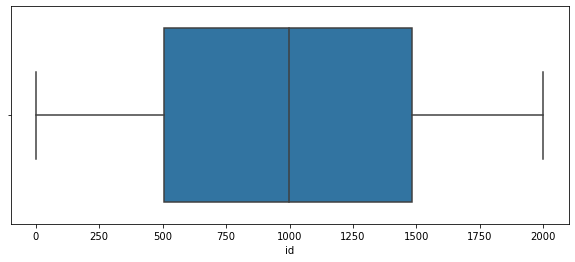

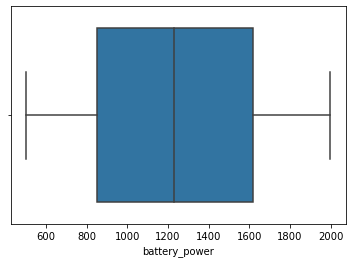

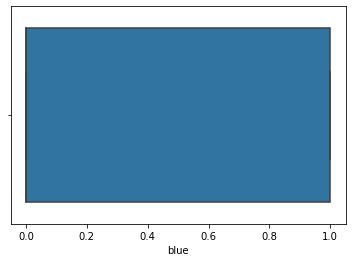

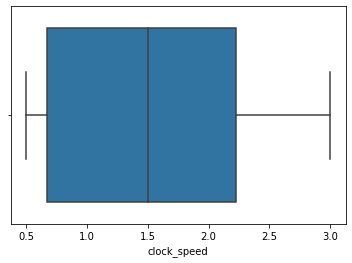

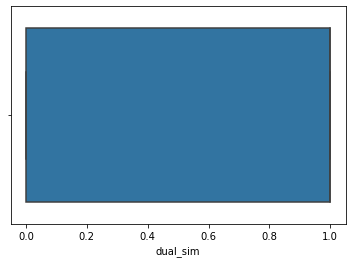

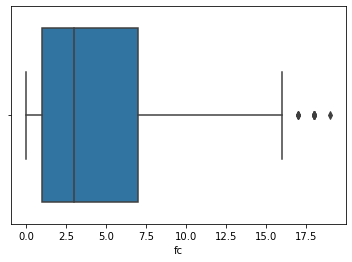

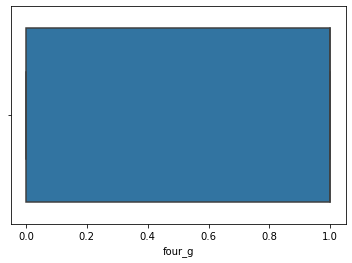

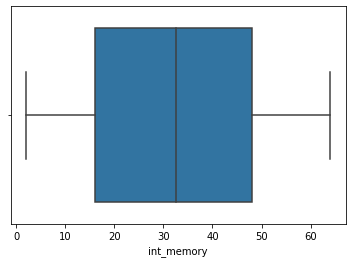

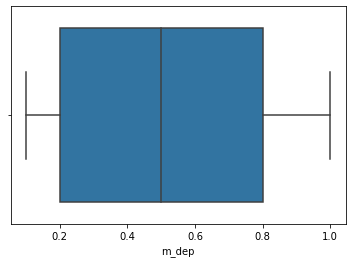

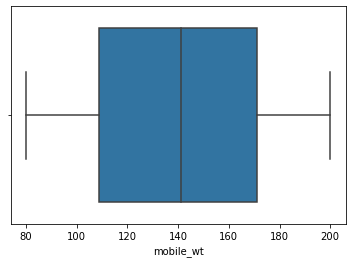

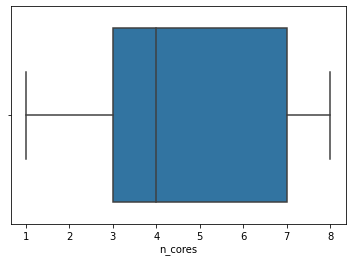

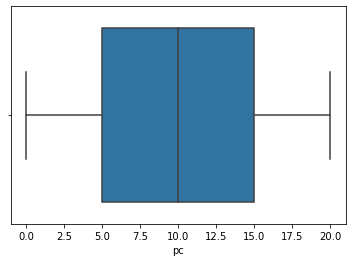

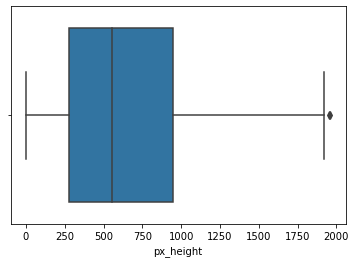

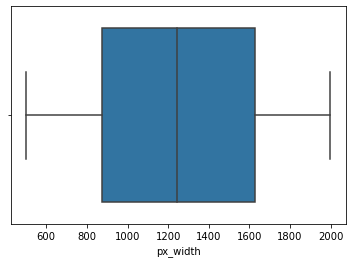

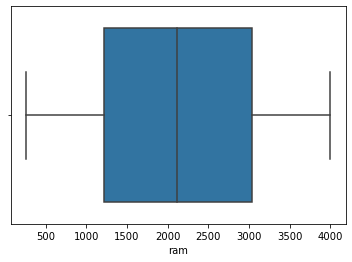

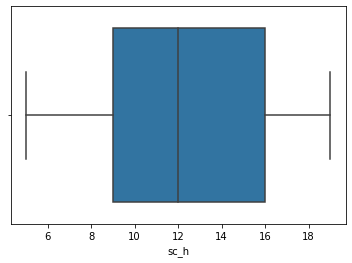

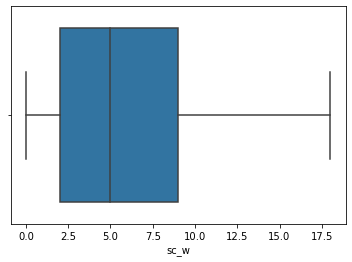

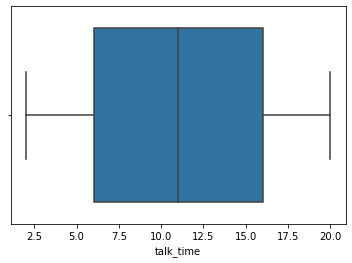

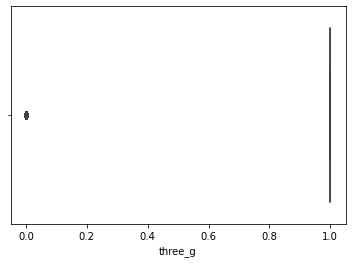

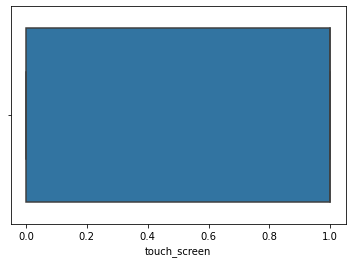

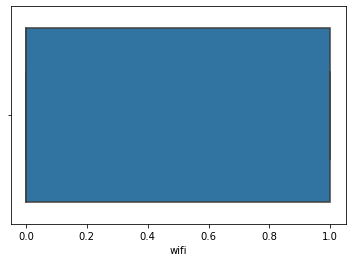

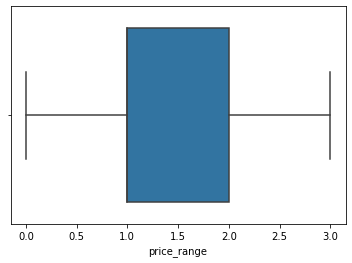

In [48]:
plt.figure(figsize=(10,4))
# plt.xlim(-100, 3000)
for i in train.columns:
    
      sns.boxplot(x = train[i])
      plt.show()

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [86]:
X = train.drop(['id','price_range'],axis = 1)
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1923,0,0.5,1,7,0,46,0.5,191,1,10,767,1759,1489,10,9,3,1,1,1
1,633,1,2.2,0,0,1,49,0.1,139,8,1,529,1009,3560,11,1,16,1,1,1
2,1236,0,0.9,1,2,1,57,0.1,188,1,14,517,809,1406,14,12,20,1,0,1
3,781,0,1.1,0,2,0,38,0.4,198,5,7,304,1674,3508,13,8,5,0,0,1
4,1456,1,0.5,1,7,0,7,0.4,105,5,12,823,1104,1587,6,5,20,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1975,1,1.9,1,2,0,31,0.9,151,1,17,775,1607,3022,13,5,19,0,0,1
1596,589,1,0.5,0,1,1,59,0.7,146,8,4,759,1858,362,16,10,6,1,1,1
1597,1829,1,0.5,0,0,1,15,0.4,160,5,7,729,1267,2080,16,11,12,1,0,1
1598,1927,0,0.9,1,3,0,11,0.4,190,8,12,491,1506,2916,16,11,18,0,1,1


In [87]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [88]:
category_list = X.columns[[1,3,5,17,18,19]]
category_list

Index(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'], dtype='object')

In [89]:
for feature in category_list:
    
    X[feature] = X[feature].astype(object) 

In [90]:
new_X = pd.get_dummies(X)

In [91]:
new_X

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,dual_sim_0,dual_sim_1,four_g_0,four_g_1,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1
0,1923,0.5,7,46,0.5,191,1,10,767,1759,...,0,1,1,0,0,1,0,1,0,1
1,633,2.2,0,49,0.1,139,8,1,529,1009,...,1,0,0,1,0,1,0,1,0,1
2,1236,0.9,2,57,0.1,188,1,14,517,809,...,0,1,0,1,0,1,1,0,0,1
3,781,1.1,2,38,0.4,198,5,7,304,1674,...,1,0,1,0,1,0,1,0,0,1
4,1456,0.5,7,7,0.4,105,5,12,823,1104,...,0,1,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1975,1.9,2,31,0.9,151,1,17,775,1607,...,0,1,1,0,1,0,1,0,0,1
1596,589,0.5,1,59,0.7,146,8,4,759,1858,...,1,0,0,1,0,1,0,1,0,1
1597,1829,0.5,0,15,0.4,160,5,7,729,1267,...,1,0,0,1,0,1,1,0,0,1
1598,1927,0.9,3,11,0.4,190,8,12,491,1506,...,0,1,1,0,1,0,0,1,0,1


In [103]:
y = train['price_range']

In [104]:
X_train, X_val, y_train, y_val = train_test_split(new_X,y, test_size=0.2, random_state=0)

In [105]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.linear_model import LogisticClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [106]:
def fitAndPredict(model):
    """The following code makes faster to evaluate a model 
    automating the fit and accuracy process"""
    
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    return accuracy_score(y_val, prediction)

In [107]:
#Lets some models
# model1 = LogisticClassifier()
model2 = GradientBoostingClassifier()
model3 = RandomForestClassifier()
model4 = SGDClassifier()
model5 = SVC()

models = [model2, model3, model4, model5]
i = 0
accuracy = []
for model in models:
    
    i +=1
    print("Model ", i,":", model)
    print("ACC: ", fitAndPredict(model))
    accuracy.append(fitAndPredict(model))

Model  1 : GradientBoostingClassifier()
ACC:  0.90625
Model  2 : RandomForestClassifier()
ACC:  0.85625
Model  3 : SGDClassifier()
ACC:  0.525
Model  4 : SVC()
ACC:  0.940625


In [164]:
model_SVC = SVC(kernel = 'poly',degree=1, gamma = 'auto')

In [165]:
model_SVC.fit(X_train,y_train)
fitAndPredict(model_SVC)

0.975

In [166]:
predict = model_SVC.predict(X_test)

output = pd.DataFrame({'id': test.id, 'price_range': predict})

output.to_csv('my_submission.csv', index=False)
print("Submission saved")

Submission saved


In [151]:
model = XGBClassifier(max_depth=2,learning_rate=0.1,n_estimators=600,silent=False,objective='multi:softmax')

In [152]:
model.fit(X_train,y_train)
fitAndPredict(model)

/Users/hanhongxun/miniforge3/envs/tensorflow/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:39:54] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:39:54] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:39:55] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:576: 
Parameters: { "silent"

0.928125

In [114]:
X_test = test.drop(['id'],axis = 1)
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1646,0,2.5,0,3,1,25,0.6,200,2,5,211,1608,686,8,6,11,1,1,0
1,1182,0,0.5,0,7,1,8,0.5,138,8,16,275,986,2563,19,17,19,1,0,0
2,1972,0,2.9,0,9,0,14,0.4,196,7,18,293,952,1316,8,1,8,1,1,0
3,989,1,2.0,0,4,0,17,0.2,166,3,19,256,1394,3892,18,7,19,1,1,0
4,615,1,0.5,1,7,0,58,0.5,130,5,8,1021,1958,1906,14,5,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1379,0,0.5,1,1,0,19,0.3,134,8,17,387,671,3912,11,2,19,0,1,1
396,991,0,2.0,0,2,1,12,0.3,158,5,6,1209,1678,2014,11,9,10,1,0,0
397,1044,0,1.8,0,4,1,12,0.7,104,6,5,1230,1263,1794,18,7,19,1,1,1
398,728,0,2.7,1,0,0,25,0.2,88,4,1,526,1529,2039,5,1,12,1,1,1


In [115]:
for feature in category_list:
    
    X_test[feature] = X_test[feature].astype(object) 

In [116]:
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1646,0,2.5,0,3,1,25,0.6,200,2,5,211,1608,686,8,6,11,1,1,0
1,1182,0,0.5,0,7,1,8,0.5,138,8,16,275,986,2563,19,17,19,1,0,0
2,1972,0,2.9,0,9,0,14,0.4,196,7,18,293,952,1316,8,1,8,1,1,0
3,989,1,2.0,0,4,0,17,0.2,166,3,19,256,1394,3892,18,7,19,1,1,0
4,615,1,0.5,1,7,0,58,0.5,130,5,8,1021,1958,1906,14,5,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1379,0,0.5,1,1,0,19,0.3,134,8,17,387,671,3912,11,2,19,0,1,1
396,991,0,2.0,0,2,1,12,0.3,158,5,6,1209,1678,2014,11,9,10,1,0,0
397,1044,0,1.8,0,4,1,12,0.7,104,6,5,1230,1263,1794,18,7,19,1,1,1
398,728,0,2.7,1,0,0,25,0.2,88,4,1,526,1529,2039,5,1,12,1,1,1


In [117]:
X_test = pd.get_dummies(X_test)

In [118]:
X_test

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,dual_sim_0,dual_sim_1,four_g_0,four_g_1,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1
0,1646,2.5,3,25,0.6,200,2,5,211,1608,...,1,0,0,1,0,1,0,1,1,0
1,1182,0.5,7,8,0.5,138,8,16,275,986,...,1,0,0,1,0,1,1,0,1,0
2,1972,2.9,9,14,0.4,196,7,18,293,952,...,1,0,1,0,0,1,0,1,1,0
3,989,2.0,4,17,0.2,166,3,19,256,1394,...,1,0,1,0,0,1,0,1,1,0
4,615,0.5,7,58,0.5,130,5,8,1021,1958,...,0,1,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1379,0.5,1,19,0.3,134,8,17,387,671,...,0,1,1,0,1,0,0,1,0,1
396,991,2.0,2,12,0.3,158,5,6,1209,1678,...,1,0,0,1,0,1,1,0,1,0
397,1044,1.8,4,12,0.7,104,6,5,1230,1263,...,1,0,0,1,0,1,0,1,0,1
398,728,2.7,0,25,0.2,88,4,1,526,1529,...,0,1,1,0,0,1,0,1,0,1


In [119]:
predict = model5.predict(X_test)

output = pd.DataFrame({'id': test.id, 'price_range': predict})

output.to_csv('my_submission.csv', index=False)
print("Submission saved")

Submission saved


In [153]:
# # XGB

# predict = model.predict(X_test)

# output = pd.DataFrame({'id': test.id, 'price_range': predict})

# output.to_csv('my_submission.csv', index=False)
# print("Submission saved")

Submission saved


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

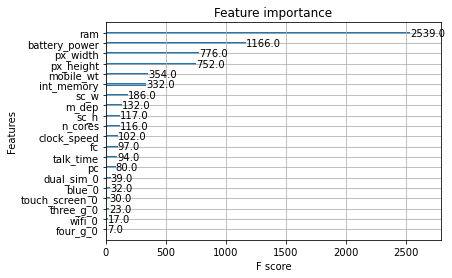

In [155]:
# plot_importance(model)